<a href="https://colab.research.google.com/github/wnyngj/class2021fall/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tokenization

문장을 단어별로 쪼개는 것

In [1]:
import nltk

In [2]:
text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [ ]:
text[0:10] #마지막 포함 X
text[:10]
text[0:]
text[:]
text[:-1]

In [ ]:
text.split() #리스트로 출력 
#원시형태 tokenize, 근데 문장부호 포함된 상태로 나누므로 word_tokenize 하기

In [ ]:
' '.join(text.split())

In [ ]:
from nltk.tokenize import word_tokenize   #문장부호도 token
nltk.download('punkt')    #문장부호 다운받기
words = word_tokenize(text)
words   #split과 달리 문장부호랑 어휘 분리해줌

In [ ]:
from nltk.tokenize import RegexpTokenizer   #정규표현을 기반으로 한 tokenizer 다운 받기
retokenize = RegexpTokenizer("[\w]+")   #[\w]+ = 알파벳이나 숫자 여러개 = word
words = retokenize.tokenize(text)
words

### Normalization  
변이형(활용)을 표준화하는 것

Stemming: am → am, the going → the go, having → hav  
원형으로 되게끔 딱 짤라버림


Lemmatization: am → be, the going → the going, having → have

사전에 등재된 원형으로 만들어줌

In [5]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(w) for w in words]  #각각 str로 되어있는 list인 words 변수

stemmer.stem('having')    #한 단어를 인풋으로 받아서 표준화하여 아웃풋 처리함

'have'

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]

### Stopword

전치사,조동사,대명사 등 너무 자주 나오는 것 stop제외하기

In [36]:
from nltk.corpus import stopwords  
nltk.download('stopwords')    #너무 자주 나오는 것 패키지로 묶여 나왔음/불러오기
#stopwords.words('english')   이것으로 확인 가능

print(words)
words = [w for w in words if not w in stopwords.words('english')] 
#w가 스탑워즈에 들어있지 않으면 출력해라
print(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', 'indulgent', 'father', 'and', 'had', 'in', 'consequence', 'of', 'her', 'sister', 's', 'marriage', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', 'Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', 'and', 'her', 

### Collocation, Concordance

두 단어의 연쇄

예문 찾기

In [19]:
nltk.download('gutenberg')    #corpus이름 gutenburg(저작권없는 text들 모았음)
    #text = nltk.corpus.gutenberg.raw('melville-moby_dick.txt') 1242990개 문자,str 형태
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
#words=nltk.word_tokenize(text) 토큰ize되어 리스트로 담김
words = retokenize.tokenize(text)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [ ]:
nltk.Text(words).collocations()   #빈번하게 나오는  단어들 print 되어 나옴

In [ ]:
nltk.Text(words).concordance('Emma', 79, 10)    #용례찾기
  #'Emma' 중간으로 포함해서 양쪽 78개의 단어/ 용례들을 10개 print하기

Displaying 10 of 865 matches:
                                     Emma by Jane Austen 1816 VOLUME I CHAPTER
                                     Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this


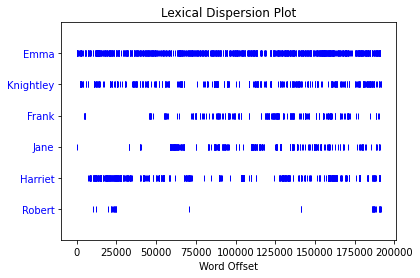

In [ ]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])
#x축 words 인덱스
#엠마는 처음부터 끝까지 다 나오는 주인공이구나
#프랭크는 중반부부터 등장하는구나

In [ ]:
nltk.Text(words).similar("Emma")    #엠마와 비숫하게 쓰이는 것

she it he i weston her you harriet elton him me knightley jane that
and the all there they them


In [ ]:
nltk.Text(words).common_contexts(["Emma", "she"])   #위치_에 emma나 she가 쓰인다

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


### Frequency distribution, Frequency plot

Frequency 빈도수. 셰익스피어의 작품들에서 어떤 단어가 가장 많이 나오는가


In [ ]:
fd = nltk.FreqDist(words).most_common(20)  
# 20 위 까지, 100위까지 했을 때 to, the 이런 단어들은 stop words로 가지 쳐낼 수 있음
fd

[('to', 5183),
 ('the', 4844),
 ('and', 4672),
 ('of', 4279),
 ('I', 3178),
 ('a', 3004),
 ('was', 2385),
 ('her', 2381),
 ('it', 2128),
 ('in', 2118),
 ('not', 2101),
 ('be', 1970),
 ('she', 1778),
 ('that', 1730),
 ('you', 1677),
 ('had', 1606),
 ('as', 1387),
 ('he', 1365),
 ('for', 1321),
 ('have', 1301)]

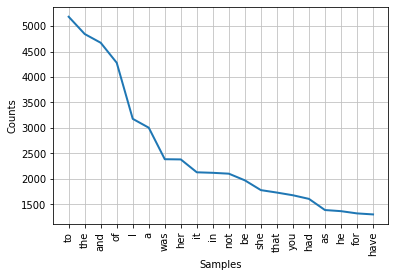

In [ ]:
nltk.Text(words).plot(20)   #상위 20위까지를 plotting하기

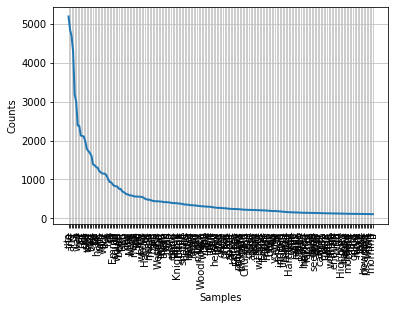

In [21]:
nltk.Text(words).plot(200)    #문학작품속 수학

### Dictionary

In [ ]:
nltk.download('words')
nltk.corpus.words.words('en')[-20:-1]   #마지막 포함X, cf)[-20:]면 마지막까지O


In [ ]:
len(nltk.corpus.words.words('en'))   #영어단어의 개수

235886

### Regular expression중요

corpus에서 r과 t가 있는 단어들을 찾아내라.
규칙만들어서 적용할 수 있음
nlp업계의 필수 분야
******* str만 적용 가능
리스트면 str화 해야함

In [14]:
import re

In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)    #혹은
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure) #0개이상
+	        One or more of previous item, e.g. a+, [a-z]+   #1개이상
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats    #{1,} = 1번이상
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

In [15]:
word = 'supercalifragilisticexpialidocious'
re.search('[aeiou]li',word) #ali/elil/ili/oli/uli있으면 찾아라
re.search('.li',word)
#search 제일 첫번째로 나오는 것 하나만 불러옴

<re.Match object; span=(6, 9), match='ali'>

In [39]:
engdict = nltk.corpus.words.words('en') #리스트

result = [w for w in engdict if re.search('ed$', w)]    #w=개별단어 string
# result = [w for w in engdict if re.search('^..j..t..$', w)]   #abjectly,adjuster ...
# result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]   #gold,golf,hold,hole 와우 4개뿐
# result = [w for w in engdict if re.search('^[ah]+$', w)][:10] #a,aa,ah,aha,h,ha,hah
print(result[:10])

['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded']


In [25]:
re.findall('con','considered condo')
re.findall('^con','considered condo')
re.findall('[^[a-z]','Considered 3condo')

['C', ' ', '3']

In [27]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.words()    #WallStreetJournal

result = [w for w in wsj if re.search('(ed|ing)$', w)]
# result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]   #0.0085,0.05
# result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]   #C$,US$
# result = [w for w in wsj if re.search('^[0-9]{4}$', w)]   #1614,1637 #\d로 대체할 수 있겠지
# result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]    #10-day,10-lap,100-share
# result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)] #black-and-white

result = sorted(set(result))
#오름차순으로 만들기 = list를 set화하고 sort시키기
print(result[:10])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced', 'Advancing', 'Alfred', 'Allied', 'Annualized', 'Anything']


### Extract information (pos tag, named entity)

pos: part of speech =품사
품사 태깅,
카테고리 태깅
starbucks = location

In [42]:
sent = "I am Jhon from America and would like to go to Starbucks"
words = nltk.word_tokenize(sent)    #tokenize한뒤!!

In [ ]:
'''
POS tag list:

CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there (like: "there is" ... think of it like "there exists")
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective	'big'
JJR	adjective, comparative	'bigger'
JJS	adjective, superlative	'biggest'
LS	list marker	1)
MD	modal	could, will
NN	noun, singular 'desk'
NNS	noun plural	'desks'
NNP	proper noun, singular	'Harrison'
NNPS	proper noun, plural	'Americans'
PDT	predeterminer	'all the kids'
POS	possessive ending	parent's
PRP	personal pronoun	I, he, she
PRP$	possessive pronoun	my, his, hers
RB	adverb	very, silently,
RBR	adverb, comparative	better
RBS	adverb, superlative	best
RP	particle	give up
TO	to	go 'to' the store.
UH	interjection	errrrrrrrm
VB	verb, base form	take
VBD	verb, past tense	took
VBG	verb, gerund/present participle	taking
VBN	verb, past participle	taken
VBP	verb, sing. present, non-3d	take
VBZ	verb, 3rd person sing. present	takes
WDT	wh-determiner	which
WP	wh-pronoun	who, what
WP$	possessive wh-pronoun	whose
WRB	wh-abverb	where, when
'''

In [43]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words)
pos

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('I', 'PRP'),
 ('am', 'VBP'),
 ('Jhon', 'RB'),
 ('from', 'IN'),
 ('America', 'NNP'),
 ('and', 'CC'),
 ('would', 'MD'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('to', 'TO'),
 ('Starbucks', 'VB')]

In [44]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos)   #NE = Named Entity

# common Entity types: ORGANIZATION그룹, PERSON사람, LOCATION장소, DATE날짜, TIME시간, MONEY돈, and GPE위치정보 (geo-political entity)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


In [45]:
print(NE)   #America를 GPE, 즉 위치정보로 인식함

(S
  I/PRP
  am/VBP
  Jhon/RB
  from/IN
  (GPE America/NNP)
  and/CC
  would/MD
  like/VB
  to/TO
  go/VB
  to/TO
  Starbucks/VB)


비정형 문장에서 정보 추출하는 방법 2가지

named entity(명사) ... intention
(스타벅스) ... (가고싶다)
(미래관) .. (공부하다) 

### Wordcloud

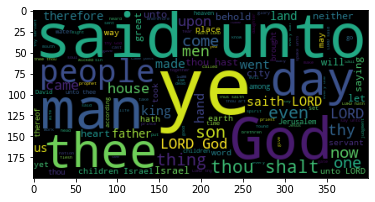

In [46]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')

wc = WordCloud().generate(text) 
plt.imshow(wc)

In [ ]:
STOPWORDS   #약 150개 리스트 형태

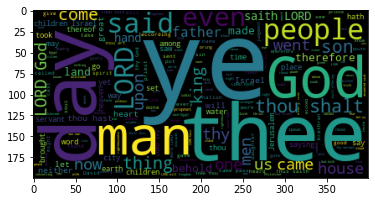

In [ ]:
stopwords = set(STOPWORDS)  #set화 하기
stopwords.add('unto')   #원래 stopwords패키지에 unto도 추가하기
wc = WordCloud(stopwords = stopwords).generate(text) 
plt.imshow(wc)